# Business Problem

To build a model to predict the prices of flights using various input features

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# categorical - countplots
def countplot_columns(df, columns):
    plt.figure(figsize=(10,6))
    plot=sns.countplot(x=columns,data=df)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    total=len(df[columns])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

# Reading the training dataset

In [3]:
df_train = pd.read_excel("C:/Users/TANVI/Desktop/Python Projects/Data_Train.xlsx")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
df_train.shape

(10683, 11)

In [7]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Training Dataset contains 10683 rows, 10 independent variables and 1 dependent variable - Price

# Data Cleaning

### 1. Null Values

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.dropna(inplace=True)

In [10]:
df_train.shape

(10682, 11)

### 2. Duplicate Values

In [11]:
df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [12]:
df_train.drop_duplicates(keep='first',inplace=True)

In [13]:
df_train.shape

(10462, 11)

# EDA

In [14]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


### UUnivariate Analysis

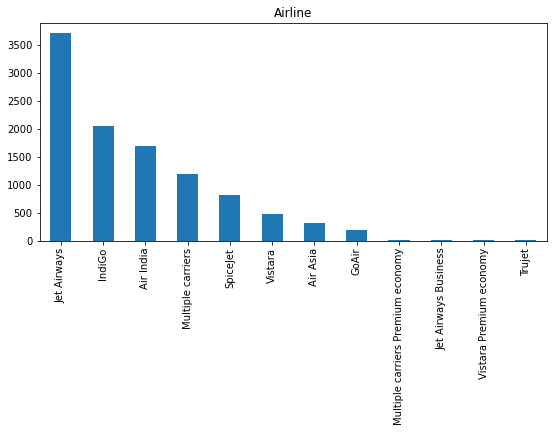

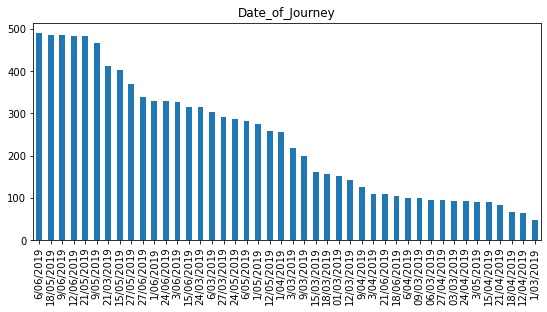

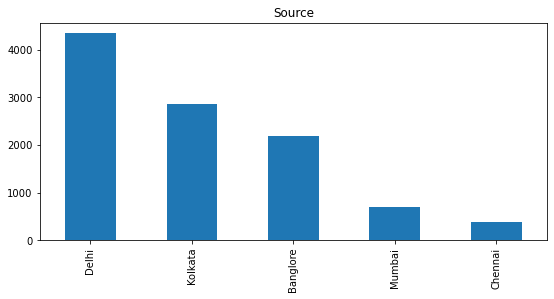

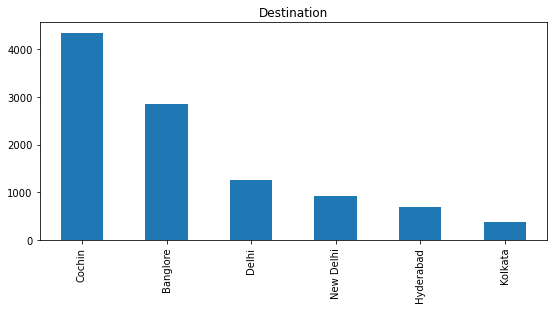

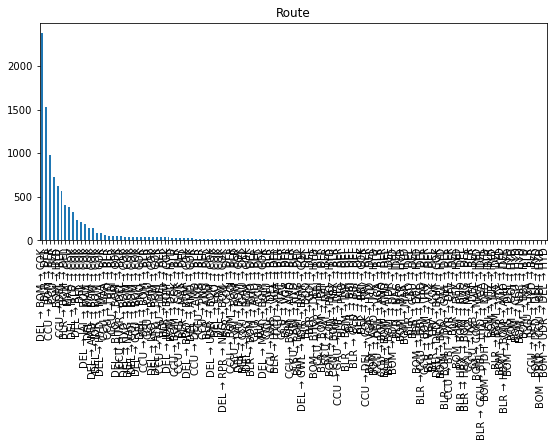

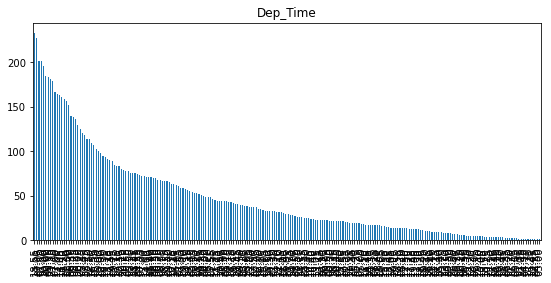

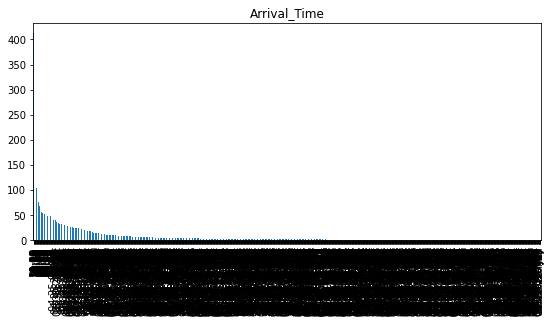

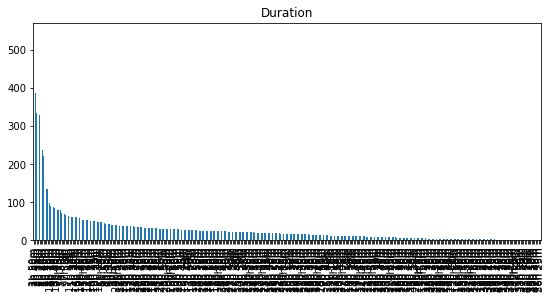

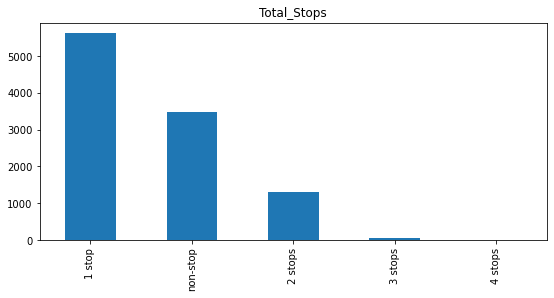

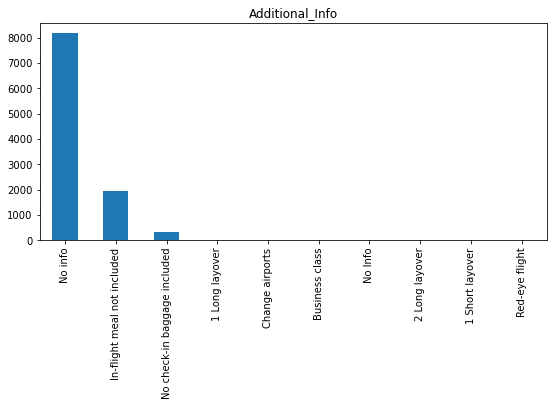

In [16]:
categorical_col = df_train.select_dtypes(include=['object']).columns

# Bar chart for each categorical col
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df_train[column].value_counts().plot(kind='bar')
    plt.title(column)

Jet Airways is the most preferred airline followed by Indigo and AirIndia. 

Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

In [17]:
df_train["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

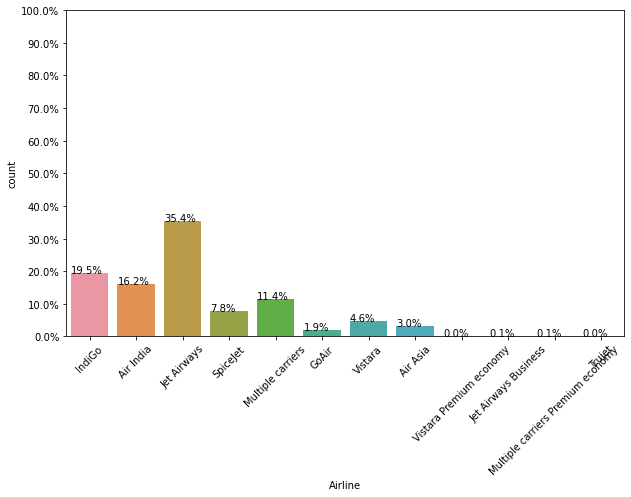

In [18]:
countplot_columns(df_train,'Airline')

In [19]:
df_train.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

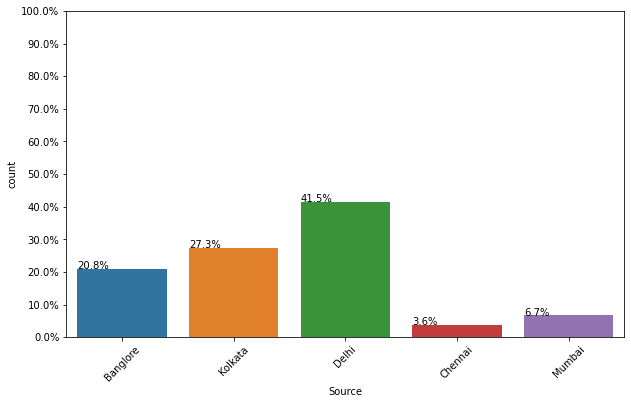

In [20]:
countplot_columns(df_train,"Source")

In [21]:
df_train.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

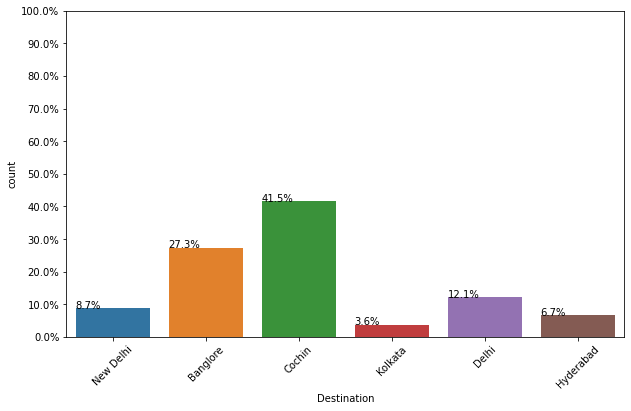

In [22]:
countplot_columns(df_train,"Destination")

## Feature Engineering

In [23]:
# Categorical Data

In [24]:
# Norminal data : unordered : One Hot Encode
# Ordinal : ordered : Label Encoder

#### 1. Airline : nominal 

In [25]:
airline = df_train[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


#### 2. Day,Month of Journey

In [26]:
# Date - datetime format

In [27]:
df_train["Journey_Day"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_train['Journey_month'] = pd.to_datetime(df_train['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [28]:
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

#### 3. Hour , Min of Departure

In [29]:
df_train["Departure_Hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train['Departure_Min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [30]:
df_train.drop(["Dep_Time"],axis=1,inplace=True)

#### 4. Hour , Min of Arrival

In [31]:
df_train["Arrival_Hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train['Arrival_Min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [32]:
df_train.drop(["Arrival_Time"],axis=1,inplace=True)

#### 5. Source : nominal

In [33]:
source = df_train[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


#### 6. Destination : nominal 

In [34]:
dest = df_train[['Destination']]
dest = pd.get_dummies(dest,drop_first=True)
dest.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


#### 7. Additional Info

In [35]:
df_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

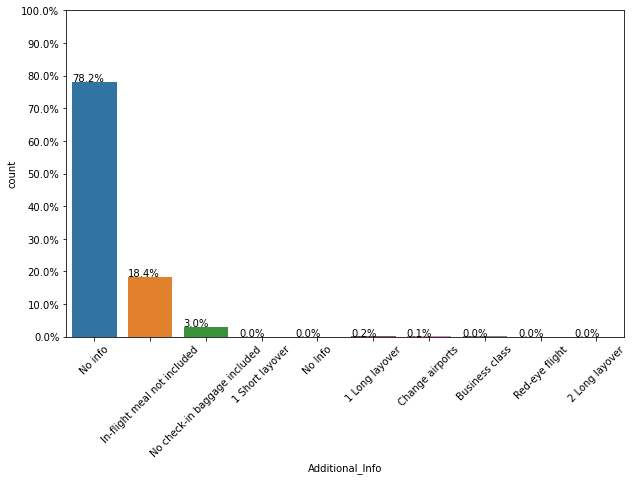

In [36]:
countplot_columns(df_train,"Additional_Info")

##### 78% of additional info has no_info , hence dropped

In [37]:
df_train.drop(["Additional_Info"],axis=1,inplace=True)

#### 8. Route, Total Stops are related - so dropping Route

In [38]:
pd.crosstab(df_train.Route,df_train.Total_Stops)

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Route,,,,,
BLR → AMD → DEL,18,0,0,0,0
BLR → BBI → DEL,5,0,0,0,0
BLR → BDQ → DEL,8,0,0,0,0
BLR → BOM → AMD → DEL,0,4,0,0,0
BLR → BOM → BHO → DEL,0,11,0,0,0
...,...,...,...,...,...
DEL → PNQ → COK,42,0,0,0,0
DEL → RPR → NAG → BOM → COK,0,0,15,0,0
DEL → TRV → COK,16,0,0,0,0


In [39]:
df_train.drop(["Route"],axis=1,inplace=True)

#### 9. Total Stops - ordinal - Label Encoder - values assigned keys

In [40]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
df_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

#### 10. Duration - not in correct format

In [42]:
#list all items from the duration columns

duration = list(df_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # check if duration contains only "h" or "m"
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" ## adds 0 minutes
        else:
            duration[i] = "0h " + duration[i] # adds  0 hour
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))# extacts hour
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) ## extracts min

In [43]:
df_train['Duration_hours'] = duration_hours
df_train['Duration_mins'] = duration_mins

In [44]:
df_train.drop(["Duration"],axis=1,inplace=True)

#### Append everything to train dataset with different name

In [45]:
df_train_final = pd.concat([df_train,airline,source,dest],axis=1)

In [46]:
df_train_final.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [47]:
df_train_final.head(2)

,Total_Stops,Price,Journey_Day,Journey_month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [48]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


# Reading Test Dataset

### Applying same feature engg to test dataset

In [49]:
df_test = pd.read_excel("C:/Users/TANVI/Desktop/Python Projects/Test_set.xlsx")

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [51]:
df_test.shape

(2671, 10)

In [52]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [53]:
# airline
airline_test = df_test[['Airline']]
airline_test = pd.get_dummies(airline_test,drop_first=True)
# journey - day and month
df_test["Journey_Day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"],axis=1,inplace=True)
# departure, arrival - hr and min
df_test["Departure_Hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test['Departure_Min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop(["Dep_Time"],axis=1,inplace=True)
df_test["Arrival_Hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test['Arrival_Min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop(["Arrival_Time"],axis=1,inplace=True)
# source
source_test = df_test[['Source']]
source_test = pd.get_dummies(source_test,drop_first=True)
# destination
dest_test = df_test[['Destination']]
dest_test = pd.get_dummies(dest_test,drop_first=True)
# additional info
df_test.drop(["Additional_Info"],axis=1,inplace=True)
# route
df_test.drop(["Route"],axis=1,inplace=True)
# stops
df_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
# duration
#list all items from the duration columns

duration = list(df_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # check if duration contains only "h" or "m"
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" ## adds 0 minutes
        else:
            duration[i] = "0h " + duration[i] # adds  0 hour
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))# extacts hour
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) ## extracts min
df_test['Duration_hours'] = duration_hours
df_test['Duration_mins'] = duration_mins
df_test.drop(["Duration"],axis=1,inplace=True)
# concat all
df_test_final = pd.concat([df_test,airline_test,source_test,dest_test],axis=1)
df_test_final.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [54]:
df_test.head(2)

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0


In [55]:
df_test_final.head(2)

,Total_Stops,Journey_Day,Journey_month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0


# Feature Selection

### To find out which features are best and will contribute and have a good relation with the target variable

## Methods
### 1. heatmap
### 2. featureimportance
### 3. SelectKBest

In [56]:
df_train_final.shape

(10462, 30)

In [57]:
df_train_final.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month',
       'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [58]:
# Independent features 
X = df_train_final.loc[:,['Total_Stops', 'Journey_Day', 'Journey_month',
       'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [59]:
X.head(2)

,Total_Stops,Journey_Day,Journey_month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Dependent feature
y = df_train_final.iloc[:,1]

In [61]:
y.head(2)

0    3897
1    7662
Name: Price, dtype: int64

In [62]:
# heatmap

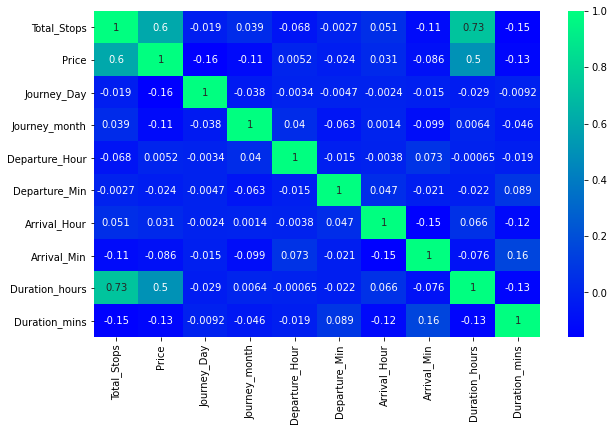

In [63]:
# correlation between independent and dependent features
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True,cmap="winter")
plt.show()

#### Total stops is positively correlated with Price and duration_hrs, so if stops increase , price will and hours of duration will too

# Features

In [64]:
# supervised - since outcome is known
# KNN
# Tree models
# Bagging and the random forest 
# boosting

### ExtraTreesRegressor Model

In [65]:
# getting feature importance to the target variable 'price'

In [66]:
# Import features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [67]:
print(selection.feature_importances_)

[2.21724209e-01 1.44632595e-01 5.34721224e-02 2.48265488e-02
 2.12719420e-02 2.70802438e-02 1.86437008e-02 1.21037856e-01
 1.75780935e-02 1.01045859e-02 1.66562310e-03 1.37793692e-02
 1.38899429e-01 6.88575379e-02 2.11921947e-02 9.43132774e-04
 2.79843294e-03 1.09652874e-04 4.88565729e-03 7.98363514e-05
 4.67691372e-04 1.51877264e-02 3.42091650e-03 7.34470285e-03
 9.58057432e-03 1.69378984e-02 7.47883239e-03 5.50919352e-04
 2.54479750e-02]


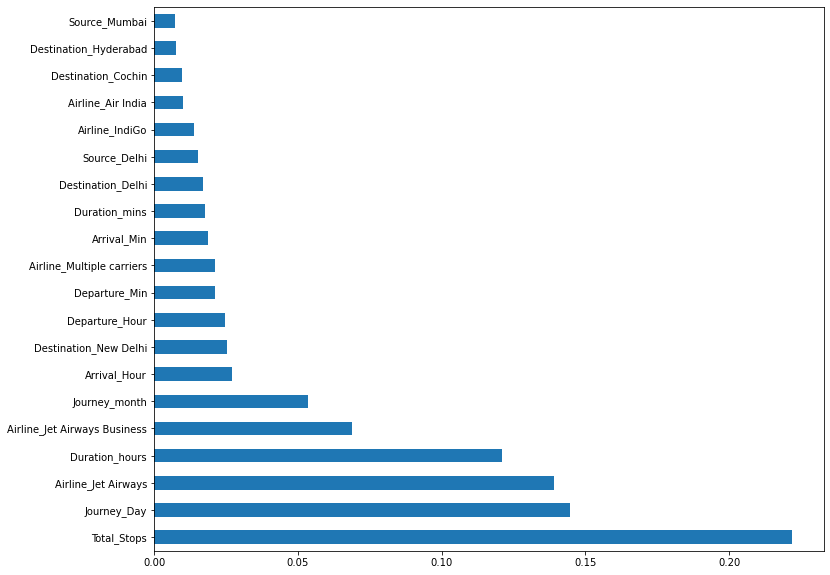

In [68]:
## plot bar graph of important features for better visualization 

plt.figure(figsize=(12,10))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

# Model

In [69]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
from sklearn import metrics

In [70]:
def get_metrics(model):
    print("MAE :", metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE :", metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

# Baseline Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
print(lr.intercept_)

7147.793385477506


In [73]:
print(lr.coef_)

[ 2.82030527e+03 -7.44774787e+01 -4.08367841e+02  2.27006945e+01
 -1.12051728e+00 -6.65201614e+00  3.30627557e+00  3.26913053e+00
 -1.91414098e+00  1.58858019e+03 -3.36482363e+01  2.59865076e+02
  4.43728895e+03  4.65654842e+04  3.81240526e+03  3.98314491e+03
 -2.15273688e+02  5.09317033e-11  2.10402889e+03  2.91438967e+03
  4.53024812e+01 -6.42874360e+00 -1.18374217e+02 -8.22754403e+02
 -6.42874360e+00 -8.38685504e+02 -8.22754403e+02  4.53024812e+01
  1.74094039e+03]


In [76]:
get_metrics(lr)

MAE : 1978.3411577906295
MSE : 8082649.146114637
RMSE : 2843.000025697263


# Lasso

In [77]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

MAE : 1979.9533968637336
MSE : 8091176.953593995
RMSE : 2844.49942056489


# Ridge

In [78]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

MAE : 1983.8749308351867
MSE : 8130274.4210928185
RMSE : 2851.3636073101616


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)
get_metrics(reg_rf)

MAE : 1190.698255796255
MSE : 3795178.322878835
RMSE : 1948.1217423145902


#### Low MAE and RMSE needed

#### From above analysis, we can see that random forest model performed best and hence we will select it as our model

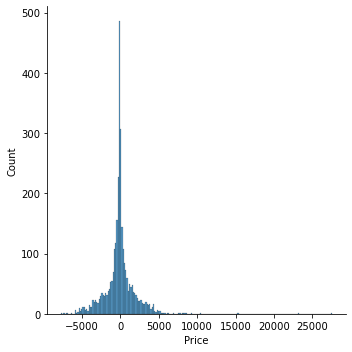

In [80]:
sns.displot(y_test - reg_rf.predict(X_test))
plt.show()

#### Displot - gives distribution plot of real value - predictions and helps to visualise how closely they correspond to a distn. Here most residuals are zero.

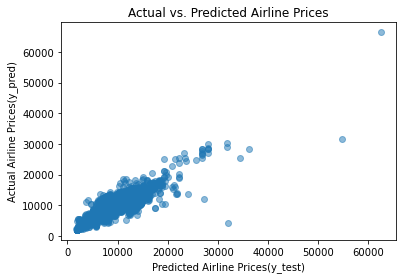

In [82]:
plt.scatter(y_test,reg_rf.predict(X_test),alpha=0.5)
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices(y_test)')
plt.ylabel('Actual Airline Prices(y_pred)')
plt.show()

## Hyperparameter Tuning

In [84]:
### Choose following method for hyperparameter tuning
### RandomizedSearchCV -- Fast
### GridSearchCV 

## Assign hyperparameters in form of dictionary
## fit the model
## check best parameter and score

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [87]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
# Random Search of parameters using 5 fold cross validation
# search across 100 different combinations 
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [89]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [96]:
rf_random.best_score_

-4941018.694167646

In [97]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [98]:
rf_random.best_index_

5

In [99]:
prediction = rf_random.predict(X_test)

In [100]:
prediction

array([14717.25051667,  3844.22766667,  4199.3745    , ...,
       14263.91694762,  4708.6       , 14430.38925714])

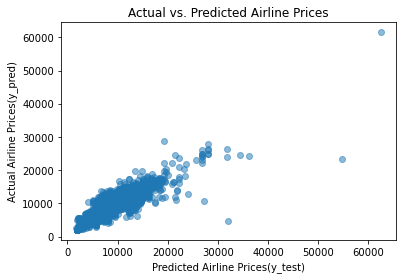

In [101]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices(y_test)')
plt.ylabel('Actual Airline Prices(y_pred)')
plt.show()

In [102]:
get_metrics(rf_random)

MAE : 1286.6855684718155
MSE : 4173026.5190502075
RMSE : 2042.7986976327861


<Figure size 1080x1080 with 0 Axes>

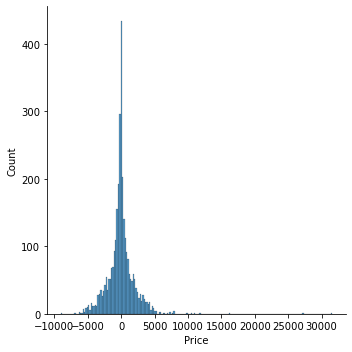

In [98]:
plt.figure(figsize=(15,15))
sns.displot(y_test-prediction)
plt.show()

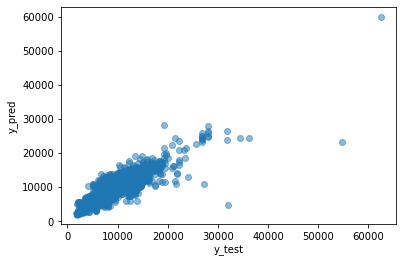

In [99]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Therefore, Hyperparameter Tuning did not improve the model

In [104]:
test_df = pd.DataFrame({
    "Predicted Price" : reg_rf.predict(X_test),
    "Actual Price" : y_test,
}).reset_index(drop = True)

test_df

,Predicted Price,Actual Price
0,14852.573167,17996
1,3839.273333,3873
2,4284.960000,4462
3,4825.423833,2228
4,4564.886000,4991
...,...,...
3134,13102.250000,10262
3135,9134.420000,8892
3136,13752.285000,14887
3137,4755.970000,4823


In [106]:
## Save the model to use again

In [107]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl','wb')

# dump the information to that file
pickle.dump(reg_rf,file)

In [108]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [109]:
y_prediction = forest.predict(X_test)

In [110]:
metrics.r2_score(y_test,y_prediction)

0.8172635531622184

In [112]:
get_metrics(forest)

MAE : 1190.698255796255
MSE : 3795178.322878835
RMSE : 1948.1217423145902


## Therefore, the final model is able to predict flight ticket prices within around 1190.69